In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('./ushape.csv', header=None)
df.columns = ['X', 'Y', 'class']

In [28]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


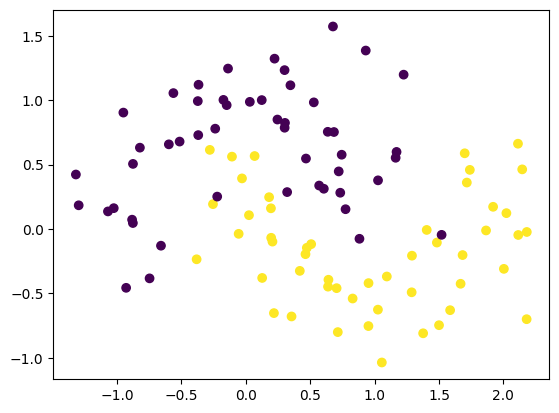

In [29]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [30]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [31]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Set parameters to 0
model.get_weights()

[array([[ 0.1287232 ,  0.09757215,  0.39139682, -0.33212474,  0.4048918 ,
          0.29512542,  0.45250338, -0.6768986 , -0.23032731, -0.08890742],
        [-0.581833  , -0.33823755, -0.65661335, -0.34236103, -0.00919998,
         -0.57294863,  0.20775008, -0.52501976,  0.25638735, -0.15634018]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.43320265,  0.39002728,  0.28323108, -0.5103386 , -0.42113757,
         -0.2665462 ,  0.21018332,  0.11398566, -0.35031986,  0.44253153],
        [-0.06476656,  0.10741258,  0.17063236, -0.3436014 ,  0.15707022,
          0.32144934, -0.29709327, -0.03638059, -0.3225774 , -0.32695493],
        [-0.13425112, -0.2335054 ,  0.4152425 , -0.3165837 ,  0.48017478,
          0.02025211,  0.14556742,  0.02294797,  0.20624804,  0.28974187],
        [-0.5259466 ,  0.4491642 , -0.32985604, -0.07258275, -0.38004217,
          0.2573728 , -0.30557686,  0.4162954 , -0.09976304,  0.51749253],
        [-0.11241

In [34]:
initial_weights = model.get_weights()

In [35]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1])*0.001
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1])*0.001
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1])*0.001
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1])*0.001
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1])*0.001
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [36]:
model.set_weights(initial_weights)

In [37]:
model.get_weights()

[array([[ 1.3970630e-03, -2.2640581e-04, -6.5666600e-04, -8.2645658e-04,
          1.3749760e-04, -2.9374970e-04,  1.0602411e-03, -6.4016094e-05,
          7.2806779e-06,  3.3497429e-04],
        [ 1.8564831e-03, -4.1614191e-04,  1.1608833e-03,  4.2929992e-04,
          9.7434537e-04, -6.1775051e-04,  9.3747320e-04, -1.5249704e-03,
          3.4791586e-04,  3.4882250e-04]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-7.33654248e-04, -1.44704222e-03,  5.61812660e-04,
         -8.86197027e-04,  3.01315391e-04, -2.98346258e-05,
         -9.23364365e-04, -1.53314846e-03,  6.57476310e-04,
          3.17538972e-04],
        [ 2.18452522e-04,  2.11954582e-03, -1.36211759e-03,
         -1.10882532e-03, -4.94419248e-04, -6.18120539e-04,
          7.23340549e-04,  2.43030110e-04,  1.94904557e-03,
         -1.27280407e-04],
        [ 2.08738586e-03, -9.52794915e-04,  4.71950247e-04,
         -6.95990311e-05, -2.62650807e-04,  2.07888428e-03,
        

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5430 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [40]:
model.get_weights() # see how much small the weights are

[array([[ 1.3974084e-03, -2.2555304e-04, -6.5570889e-04, -8.2976936e-04,
          1.3635065e-04, -2.9336553e-04,  1.0597239e-03, -6.3893036e-05,
          6.3718003e-06,  3.3296668e-04],
        [ 1.8562201e-03, -4.1696345e-04,  1.1601503e-03,  4.3216476e-04,
          9.7530318e-04, -6.1811775e-04,  9.3790283e-04, -1.5250845e-03,
          3.4877067e-04,  3.5061958e-04]], dtype=float32),
 array([ 1.1514330e-08,  4.0853103e-09, -1.8258858e-08, -1.2682688e-08,
         2.2381164e-08, -2.6092978e-08,  7.5603026e-09,  9.6454249e-09,
        -3.7720476e-09, -9.8580175e-09], dtype=float32),
 array([[-7.3345611e-04, -1.4470456e-03,  5.6190899e-04, -8.8606379e-04,
          3.0126062e-04, -2.9947338e-05, -9.2359475e-04, -1.5331538e-03,
          6.5746554e-04,  3.1752748e-04],
        [ 2.1833510e-04,  2.1195279e-03, -1.3621750e-03, -1.1089229e-03,
         -4.9438444e-04, -6.1804702e-04,  7.2346977e-04,  2.4304444e-04,
          1.9490391e-03, -1.2725971e-04],
        [ 2.0887849e-03, -9.52

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


<Axes: >

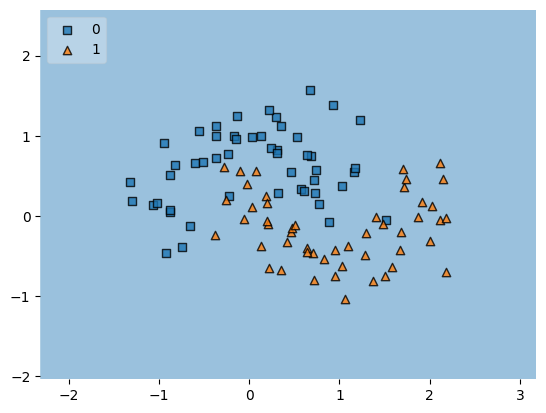

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [51]:
model2 = Sequential()

model2.add(Dense(10,activation='tanh',input_dim=2))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(10,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
initial_weights = model2.get_weights()

In [53]:
initial_weights[0] = np.random.randn(model2.get_weights()[0].shape[0], model2.get_weights()[0].shape[1])*100
initial_weights[1] = np.zeros(model2.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model2.get_weights()[2].shape[0], model2.get_weights()[2].shape[1])*100
initial_weights[3] = np.zeros(model2.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model2.get_weights()[4].shape[0], model2.get_weights()[4].shape[1])*100
initial_weights[5] = np.zeros(model2.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model2.get_weights()[6].shape[0], model2.get_weights()[6].shape[1])*100
initial_weights[7] = np.zeros(model2.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model2.get_weights()[8].shape[0], model2.get_weights()[8].shape[1])*100
initial_weights[9] = np.zeros(model2.get_weights()[9].shape)


In [54]:
model2.set_weights(initial_weights)

In [55]:
model2.get_weights()

[array([[-126.89378  ,   22.427502 , -128.98993  ,  102.75312  ,
           64.580894 ,    1.8660407,  -78.04192  ,   90.94983  ,
          -96.42455  ,  -16.495255 ],
        [  -8.963451 ,   -5.6040397,   16.594116 ,   81.14014  ,
          -81.431854 ,  -23.006592 ,    6.968633 ,  104.20272  ,
          198.36172  ,  -46.792027 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[  -1.5750647,   61.811764 ,  -23.68479  ,   -6.1040087,
          -65.31397  ,   46.138012 ,   80.865295 ,  -91.36483  ,
          -63.240498 ,  138.69809  ],
        [  11.895687 , -101.325714 ,  -98.42838  ,   -6.9616313,
          102.117485 , -116.50851  ,  -61.57687  , -191.4339   ,
          -59.4982   ,   49.08511  ],
        [  58.762047 , -250.16026  ,  221.94812  ,   37.741642 ,
           -7.901671 , -218.0556   ,  -26.518784 ,   63.13711  ,
         -141.77278  ,  -54.48325  ],
        [  -3.8305817, -111.19064  ,   -7.14816  ,  -59.77107  ,
          -75

In [56]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5852 - loss: 80.8256 - val_accuracy: 0.4500 - val_loss: 123.6573
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5891 - loss: 83.1303 - val_accuracy: 0.4500 - val_loss: 123.6387
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5813 - loss: 86.8120 - val_accuracy: 0.4500 - val_loss: 123.6198
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6008 - loss: 78.8677 - val_accuracy: 0.4500 - val_loss: 123.6001
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6359 - loss: 72.2853 - val_accuracy: 0.4500 - val_loss: 123.5779
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5813 - loss: 84.3827 - val_accuracy: 0.4500 - val_loss: 123.5558
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5930 - loss: 80.7534 - val_accuracy: 0.4500 - val_loss: 123.5308
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6125 - loss: 79.1792 - val_accur

In [58]:
model2.get_weights()

[array([[-126.89378  ,   22.427502 , -128.98993  ,  102.75312  ,
           64.580894 ,    1.8603082,  -78.04192  ,   90.94983  ,
          -96.42455  ,  -16.495255 ],
        [  -8.963451 ,   -5.6040397,   16.594116 ,   81.14014  ,
          -81.431854 ,  -23.012318 ,    6.968633 ,  104.20272  ,
          198.36172  ,  -46.792027 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00572836,  0.        ,  0.        ,  0.        ,  0.        ],
       dtype=float32),
 array([[  -1.5750647,   61.811764 ,  -23.68479  ,   -6.1040087,
          -65.31397  ,   46.138012 ,   80.865295 ,  -91.37055  ,
          -63.240498 ,  138.69809  ],
        [  11.895687 , -101.325714 ,  -98.42838  ,   -6.9616313,
          102.117485 , -116.50851  ,  -61.57687  , -191.4282   ,
          -59.4982   ,   49.08511  ],
        [  58.762047 , -250.16026  ,  221.94812  ,   37.741642 ,
           -7.901671 , -218.0556   ,  -26.518784 ,   63.13139  ,
         -1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

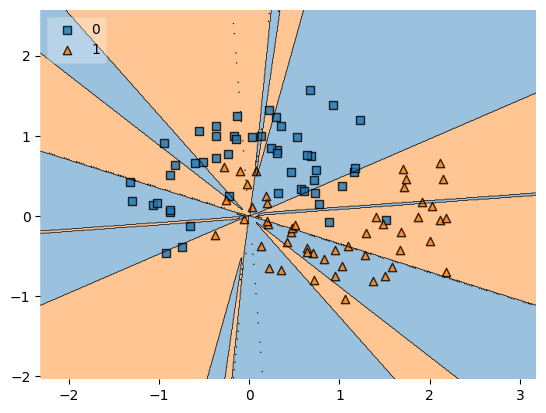

In [ ]:

plot_decision_regions(X,y.astype('int'), clf=model2, legend=2) # wow star like!! 